In [19]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [32]:
# Reading and printing the dataset
data = pd.read_csv('iot_dataset.csv')
data

,id,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity
0,0,-0.999750,12.8621,10.3683,10.4383,11.6699,13.4931,13.3423,8.04169,8.73901,26.2257,59.0528
1,0,-0.999472,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299
2,0,-0.999194,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093
3,0,-0.998916,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905
4,0,-0.998627,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736
...,...,...,...,...,...,...,...,...,...,...,...,...
928986,99,1.675182,12.6224,10.5805,10.7432,12.1775,12.6498,17.2926,6.20449,7.05966,27.7282,54.1532
928987,99,1.675460,12.6236,10.5796,10.7436,12.1780,12.6511,17.2918,6.20444,7.05980,27.7312,54.1423
928988,99,1.675738,12.6244,10.5795,10.7437,12.1782,12.6524,17.2907,6.20451,7.05967,27.7339,54.1324
928989,99,1.676016,12.6243,10.5797,10.7440,12.1784,12.6532,17.2904,6.20468,7.05969,27.7364,54.1235


In [3]:
# Looking at the statistical attributes of the dataset
data.describe()

,id,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity
count,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000
mean,49.256372,0.403261,12.185350,8.958396,8.945006,10.130319,15.154167,16.052371,5.390618,5.912815,27.283373,57.568023
std,28.453089,0.859865,0.868116,1.558196,1.748622,1.711879,18.391606,3.303089,2.889244,3.304284,0.904537,4.821784
min,0.000000,-0.999999,5.431460,1.820660,1.626900,2.282920,1.901290,5.587950,1.220370,1.430530,24.434400,44.660400
25%,25.000000,-0.320817,11.980000,8.298835,8.273455,9.347275,10.244600,14.780400,4.430490,4.877900,26.764900,53.938100
50%,49.000000,0.366136,12.404700,9.462680,9.564520,10.651800,11.683500,16.521200,5.389800,5.799340,27.328400,57.180800
75%,73.000000,1.055152,12.715500,10.095900,10.207900,11.400000,13.784400,17.353100,5.989300,6.585930,27.868700,60.563500
max,99.000000,3.309882,13.733300,11.315500,11.374200,12.754800,378.750000,73.817800,102.575000,99.888100,30.325400,77.680500


In [4]:
# getting a brief information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928991 entries, 0 to 928990
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        928991 non-null  int64  
 1   time      928991 non-null  float64
 2   R1        928991 non-null  float64
 3   R2        928991 non-null  float64
 4   R3        928991 non-null  float64
 5   R4        928991 non-null  float64
 6   R5        928991 non-null  float64
 7   R6        928991 non-null  float64
 8   R7        928991 non-null  float64
 9   R8        928991 non-null  float64
 10  Temp.     928991 non-null  float64
 11  Humidity  928991 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 85.1 MB


In [6]:
# checking if there are any null values in the dataset
data.isnull().sum()

id          0
time        0
R1          0
R2          0
R3          0
R4          0
R5          0
R6          0
R7          0
R8          0
Temp.       0
Humidity    0
dtype: int64

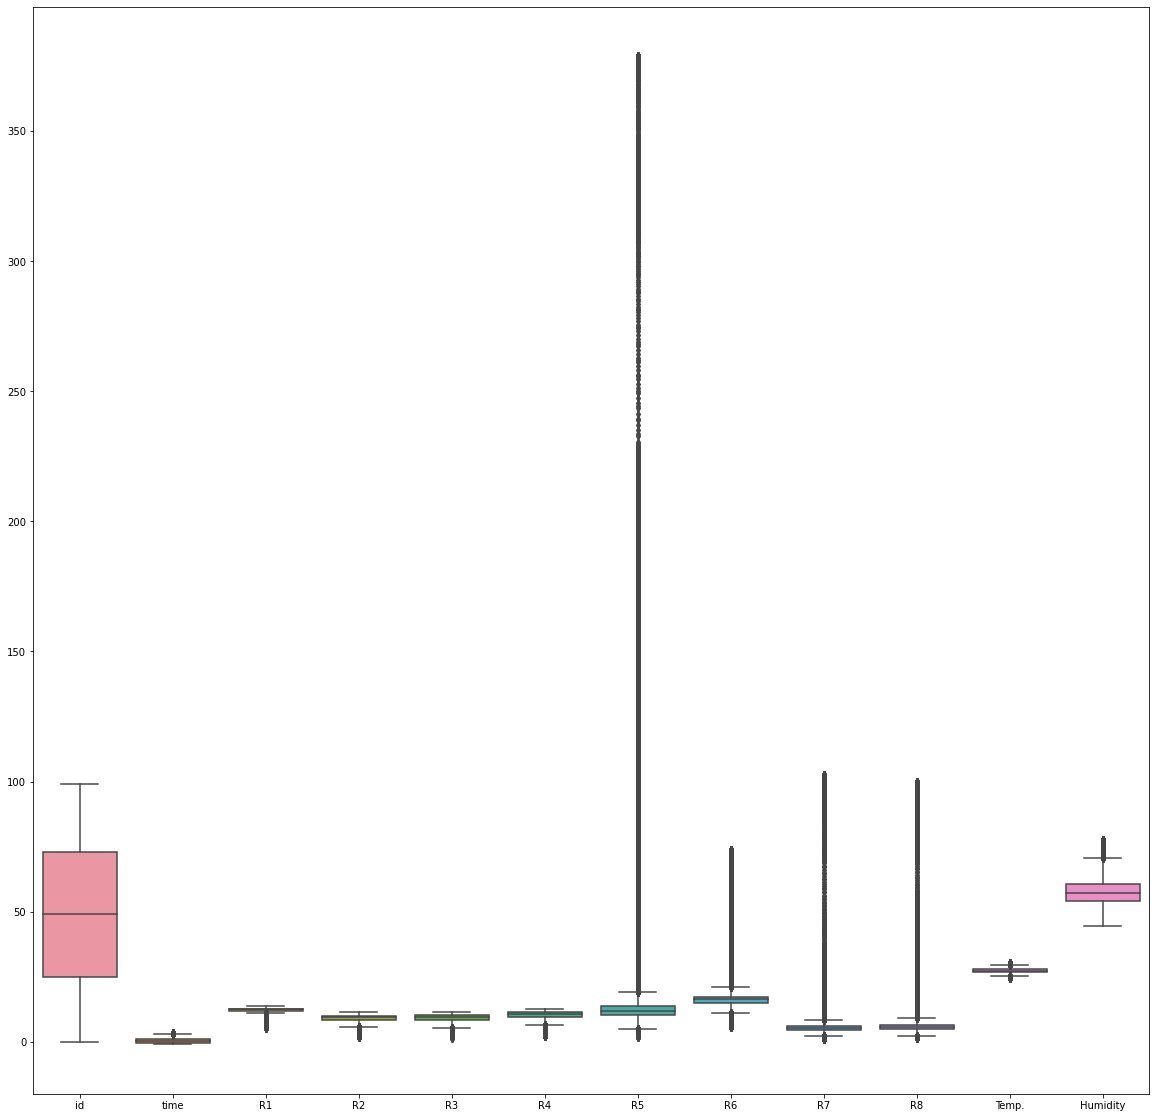

In [9]:
# plotting the boxplots of the features to see about the variation
# in the values from the mean and variance
plt.figure(figsize=(20,20))
sns.boxplot(data=data)
plt.show()

<Figure size 1440x1440 with 0 Axes>

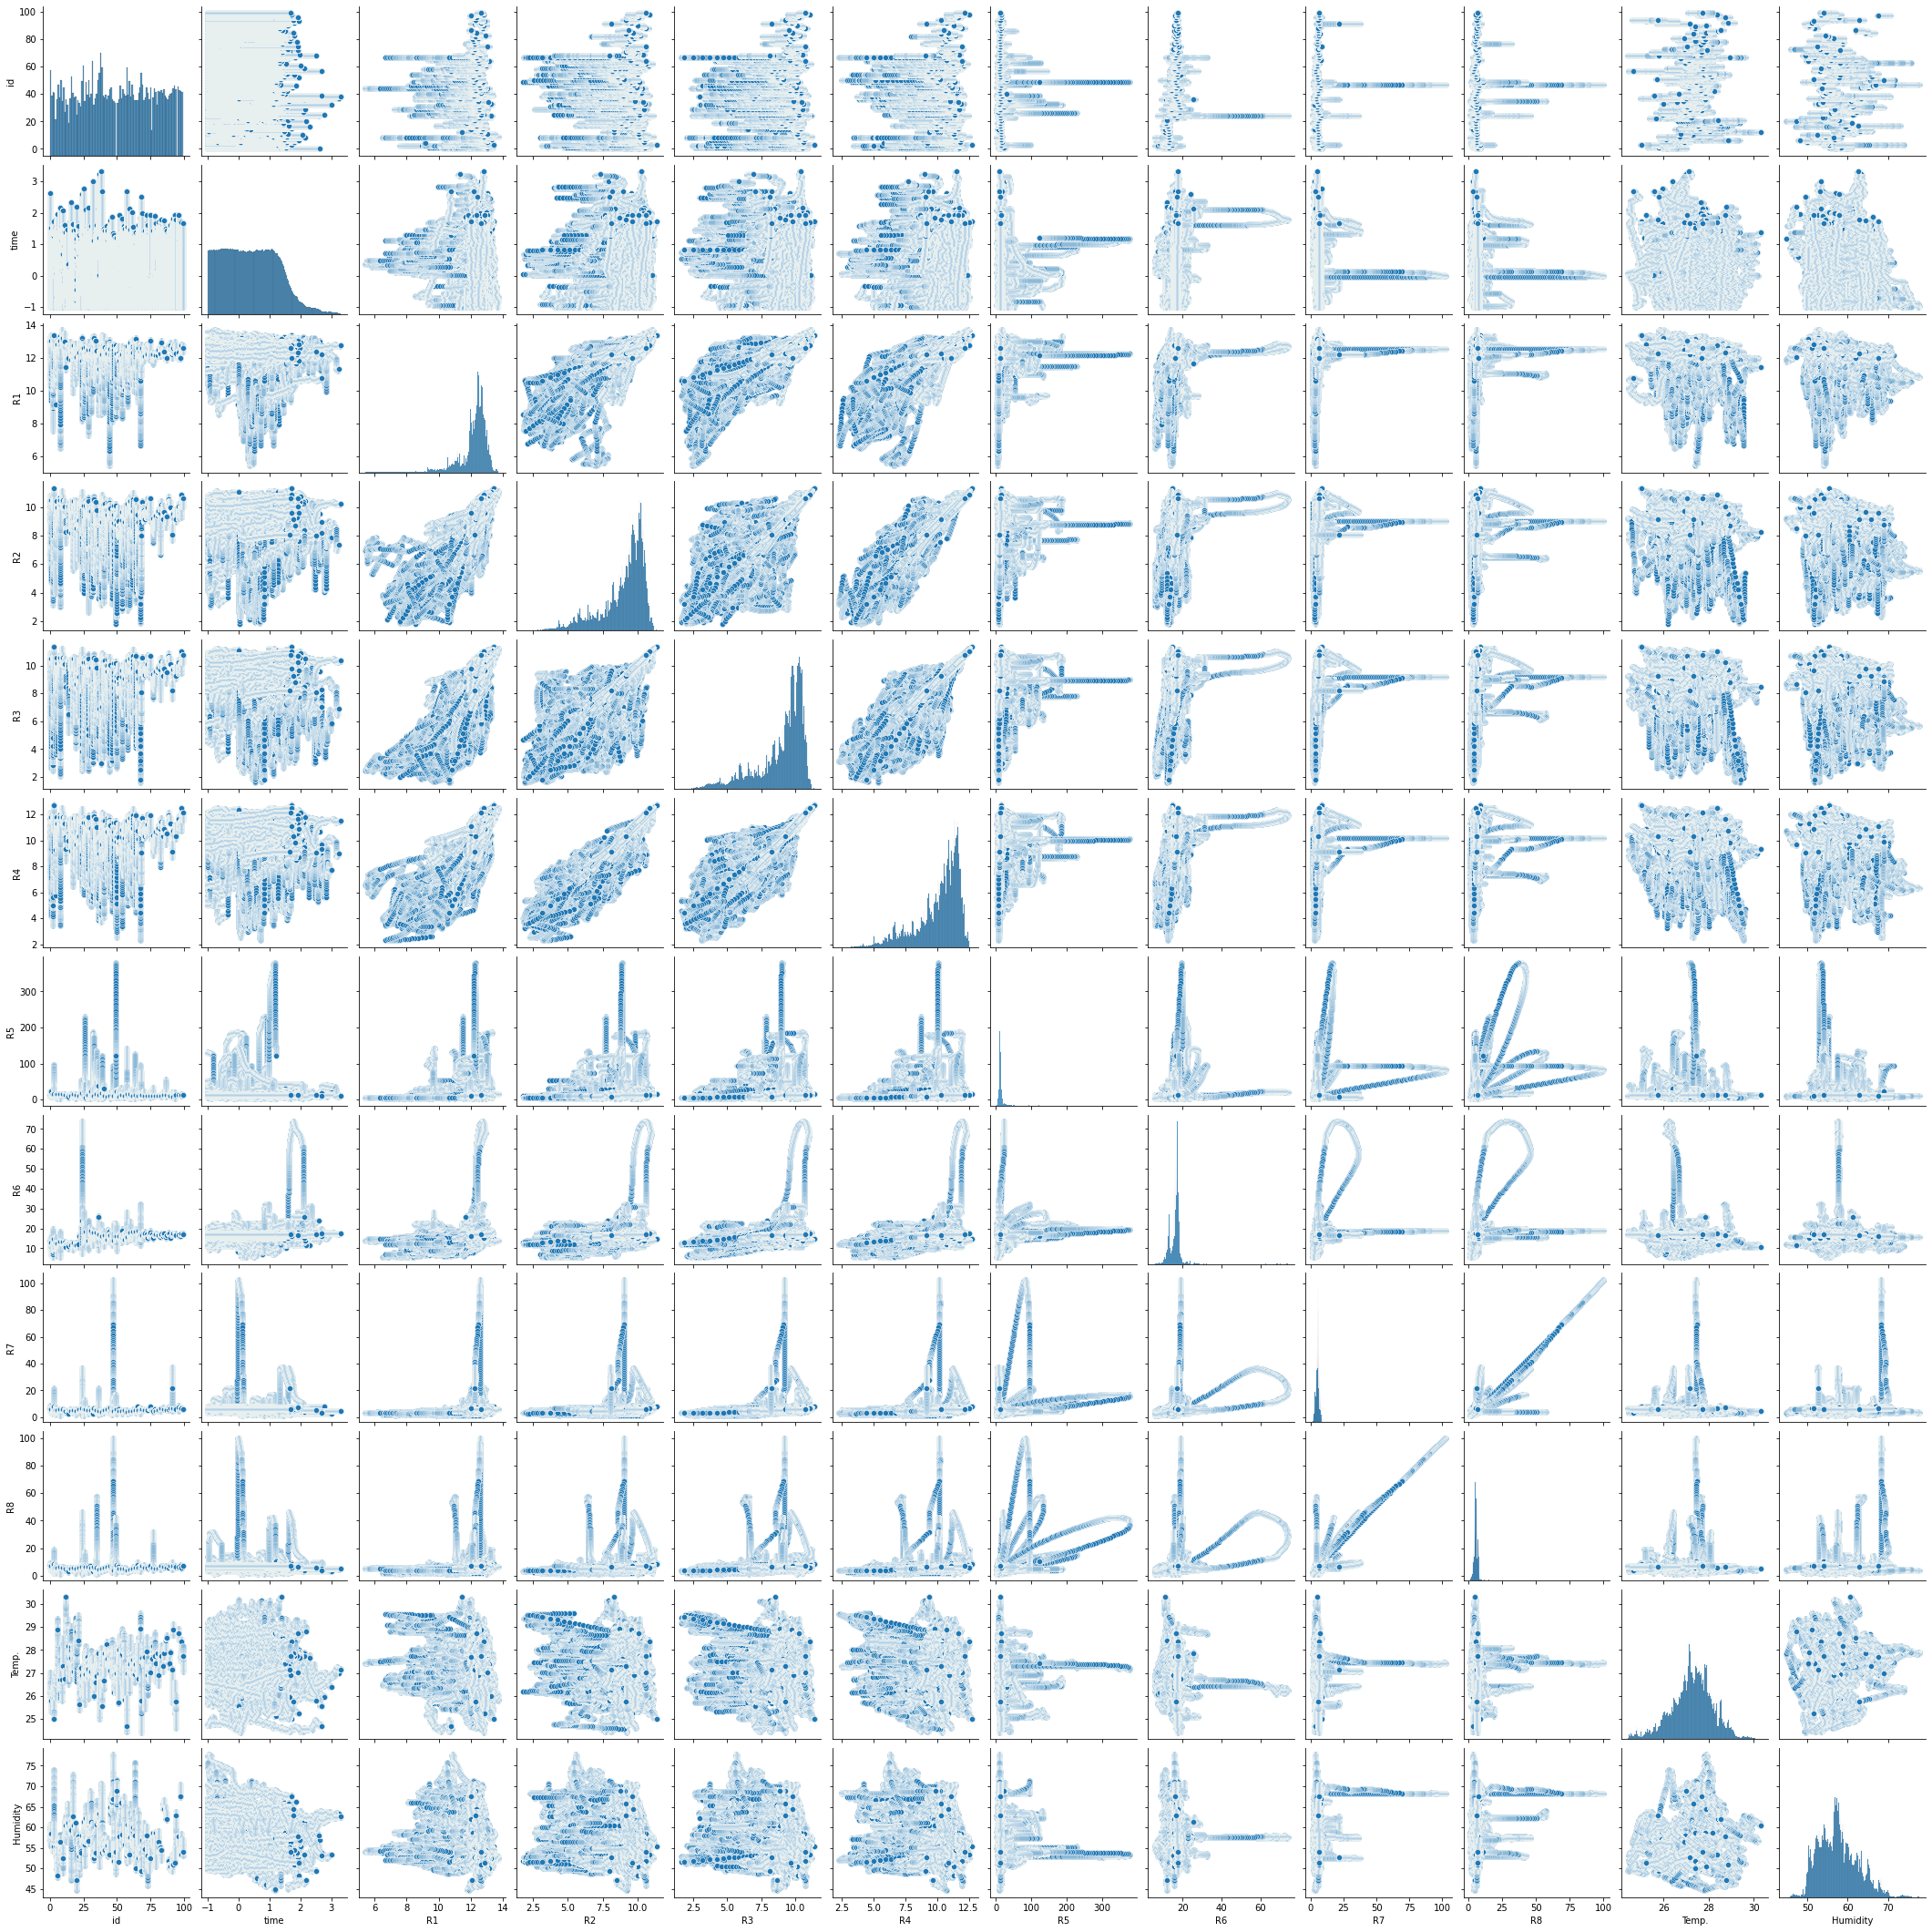

In [20]:
# plotting pairplot among all of the attributes to quickly see how they related to each other
plt.figure(figsize=(20,20))
sns.pairplot(data=data)
plt.show()

In [33]:
# Normalizing the dataset using the min-max normalization so all of the features are at same scale
# and they contribute equally to the model. It also helps model converge quickly.
cols = data.columns
data = pd.DataFrame(MinMaxScaler().fit_transform(data), columns=cols)
data

,id,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity
0,0.0,0.000058,0.895059,0.900241,0.903984,0.896399,0.030760,0.113650,0.067302,0.074230,0.304074,0.435868
1,0.0,0.000122,0.895011,0.900230,0.903902,0.896380,0.030759,0.113634,0.067298,0.074230,0.304940,0.435174
2,0.0,0.000187,0.894891,0.900272,0.903850,0.896370,0.030758,0.113624,0.067295,0.074231,0.305907,0.434550
3,0.0,0.000251,0.894831,0.900272,0.903850,0.896380,0.030757,0.113614,0.067293,0.074233,0.306773,0.433981
4,0.0,0.000318,0.894746,0.900293,0.903891,0.896399,0.030757,0.113602,0.067293,0.074238,0.307554,0.433469
...,...,...,...,...,...,...,...,...,...,...,...,...
928986,1.0,0.620709,0.866186,0.922590,0.935264,0.944871,0.028522,0.171547,0.049175,0.057173,0.559124,0.287486
928987,1.0,0.620773,0.866331,0.922495,0.935305,0.944919,0.028526,0.171536,0.049175,0.057175,0.559633,0.287155
928988,1.0,0.620838,0.866427,0.922484,0.935315,0.944938,0.028529,0.171520,0.049175,0.057173,0.560092,0.286856
928989,1.0,0.620902,0.866415,0.922505,0.935346,0.944957,0.028531,0.171515,0.049177,0.057173,0.560516,0.286586


In [39]:
# Picking up the features and the target values for designing, training and validating the model
X = data.drop(['id', 'time', 'Temp.', 'Humidity'], axis=1)
y = data['Temp.']

In [40]:
# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, shuffle=True, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((836091, 8), (836091,), (92900, 8), (92900,))

In [43]:
# Initializing, training and evaluating the decision tree regression model
# Using mean absolute error and mean squared error as the evaluation measure
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

preds = model.predict(X_test)
print('Decision Tree Regression Algorithm:')
print('Mean Absolute Error: ', mean_absolute_error(y_test, preds))
print('Mean Squared Error: ', mean_squared_error(y_test, preds))

Decision Tree Regression Algorithm:
Mean Absolute Error:  0.0005431865104475115
Mean Squared Error:  4.467708111857003e-05


In [44]:
y_test[:10], preds[:10]

(845935    0.586318
 490068    0.543711
 321737    0.532304
 269559    0.431421
 686463    0.629384
 533348    0.247140
 707778    0.479902
 746879    0.486131
 510275    0.692718
 732293    0.688117
 Name: Temp., dtype: float64,
 array([0.58647089, 0.54309964, 0.53228654, 0.43152266, 0.62924801,
        0.2471397 , 0.47974877, 0.48606349, 0.69263283, 0.68877949]))

In [46]:
# Initializing, training and evaluating the random forest regression model
# Using mean absolute error and mean squared error as the evaluation measure
model = RandomForestRegressor(n_estimators=50, n_jobs=-1)
model.fit(X_train, y_train)

preds = model.predict(X_test)
print('Random Forest Regression Algorithm:')
print('Mean Absolute Error: ', mean_absolute_error(y_test, preds))
print('Mean Squared Error: ', mean_squared_error(y_test, preds))

Random Forest Regression Algorithm:
Mean Absolute Error:  0.0005168606469265232
Mean Squared Error:  2.0533583061674068e-05


In [47]:
# Comparing the target values with the predicted values
y_test[:10], preds[:10]

(845935    0.586318
 490068    0.543711
 321737    0.532304
 269559    0.431421
 686463    0.629384
 533348    0.247140
 707778    0.479902
 746879    0.486131
 510275    0.692718
 732293    0.688117
 Name: Temp., dtype: float64,
 array([0.58664777, 0.54358819, 0.53229231, 0.4317267 , 0.62933424,
        0.24711119, 0.48005907, 0.48643592, 0.69271906, 0.68824648]))

In [117]:
# Picking up features for a deep learning model
X = data.drop(['id', 'Temp.', 'Humidity'], axis=1)
y = data['Temp.']

In [141]:
# Preparing dataset for the time-series prediction with 5 timesteps
Xs = []
ys = []

for i in range(0, len(X)-10, 5):
    Xs.append(X.iloc[i:i+5, :].values)
    ys.append(y.iloc[i+5:i+10].values)

Xs = np.array(Xs)
ys = np.array(ys)
Xs.shape, ys.shape

((185797, 5, 9), (185797, 5))

In [143]:
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.10, shuffle=True, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((167217, 5, 9), (167217, 5), (18580, 5, 9), (18580, 5))

In [144]:
# Designing the LSTM model using the Keras API of the TensorFlow library
model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5, activation='relu'))

In [145]:
# Looking at the quick summary of the model
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 32)                5376      
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                2112      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 5)                 325       
                                                                 
Total params: 7,813
Trainable params: 7,813
Non-trainable params: 0
_________________________________________________________________


In [146]:
# compiling the model before training. Using adam optimizer, mean squared error as the loss function
# to train the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [149]:
# Training the model on the training set and validating after every epoch on the test set.
# Training the model using batch size of 32 for 8 epochs
model.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/8
5226/5226 [==============================] - 31s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0653 - val_loss: 0.0053 - val_mean_absolute_error: 0.0553
Epoch 2/8
5226/5226 [==============================] - 31s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0627 - val_loss: 0.0053 - val_mean_absolute_error: 0.0552
Epoch 3/8
5226/5226 [==============================] - 32s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0606 - val_loss: 0.0057 - val_mean_absolute_error: 0.0566
Epoch 4/8
5226/5226 [==============================] - 34s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0592 - val_loss: 0.0053 - val_mean_absolute_error: 0.0556
Epoch 5/8
5226/5226 [==============================] - 32s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0574 - val_loss: 0.0044 - val_mean_absolute_error: 0.0484
Epoch 6/8
5226/5226 [==============================] - 32s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0559 - val_loss: 0.0036 - val_mean_absolute_error: 0.0436
Epoc

In [150]:
# getting predictions from the trained model on the test set
preds = model.predict(X_test)

In [151]:
# Comparing the test set target values with the predicted values
y_test[:5], preds[:5]

(array([[0.22924801, 0.22901035, 0.22878968, 0.22858598, 0.22841623],
        [0.6995926 , 0.6996605 , 0.6997284 , 0.69977932, 0.69983025],
        [0.46740791, 0.46728909, 0.46717026, 0.46706841, 0.46696656],
        [0.67385843, 0.6739433 , 0.67402818, 0.67411305, 0.67418095],
        [0.50364964, 0.50361568, 0.50359871, 0.50358173, 0.50356476]]),
 array([[0.2794797 , 0.27957502, 0.27823842, 0.27823666, 0.27820468],
        [0.70819014, 0.70812273, 0.70821935, 0.7085159 , 0.7085808 ],
        [0.4977008 , 0.4977073 , 0.4978897 , 0.49804598, 0.49807847],
        [0.6346833 , 0.6346427 , 0.6349791 , 0.63534665, 0.6354116 ],
        [0.49568713, 0.49571165, 0.49588734, 0.49597102, 0.49599248]],
       dtype=float32))